### Z-score method

Removing outliers using the z-score transformation is a simple way to identify and exclude data points that are significantly different from the average of a dataset. Here's a straightforward explanation of the method:

1. **Calculate the Mean and Standard Deviation**: First, find the mean (average) and standard deviation of your dataset. These values describe the central tendency and spread of your data, respectively.

2. **Compute the Z-Score for Each Data Point**: For each data point in your dataset, calculate its z-score using the formula:
   
   **Z-Score = (Data Point - Mean) / Standard Deviation**

   This formula tells you how many standard deviations a data point is away from the mean. A high absolute z-score indicates that a data point is far from the average, which suggests it might be an outlier.

3. **Set a Threshold**: Decide on a threshold value, usually a z-score of 2 or 3 is used. This threshold represents how far from the mean a data point can be before being considered an outlier. A z-score greater than the threshold suggests that a data point is an outlier.

4. **Identify and Remove Outliers**: Go through your dataset and identify data points with z-scores greater than the chosen threshold. These are your outliers.

5. **Remove or Handle Outliers**: You can choose to either remove these outliers from your dataset or handle them differently, depending on your analysis. Common approaches include removing them, transforming them, or imputing them with more typical values.

In essence, the z-score transformation helps you standardize your data by expressing each data point's deviation from the mean in terms of standard deviations. This makes it easier to spot data points that stand out as potential outliers, helping you make more informed decisions about how to handle them in your analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

In [2]:
# dataset

N = 40

data = np.random.randn(N)

data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2 # adding outliers

data = data*200+50 # changing scale to compare with z score
data

array([ 1.90322877e+02,  8.97471056e+01,  2.13655777e+02, -1.07880347e+01,
       -1.49359760e+02, -1.17594070e+02, -6.70884630e+01,  1.13119685e+02,
        2.83855485e+01, -2.36659595e+01,  1.25644237e+03,  1.48796242e+02,
       -1.38850680e+02, -4.83427164e+01,  1.05832634e+02, -4.26007371e-01,
        2.64435914e+01,  4.70012763e+01,  1.13540043e+02,  3.00975517e+01,
        3.54346376e+02,  2.77609457e+02,  1.80495892e+02,  1.61354388e+02,
        3.99243434e+02,  7.15004484e+01,  1.50497809e+02, -1.08482156e+02,
        1.23282740e+02, -8.64770900e+01,  3.32787814e+02,  1.53791810e+01,
        1.18352657e+02, -2.76410014e+01,  3.65375405e+02,  1.29950154e+02,
        1.61592990e+02,  9.03004053e+02,  3.99395850e+02,  2.22784997e+02])

### Converting data to z score

In [3]:
z_data = (data - np.mean(data))/np.std(data)
z_data

array([ 1.59290458e-01, -2.26451582e-01,  2.48780005e-01, -6.12037788e-01,
       -1.14350714e+00, -1.02167499e+00, -8.27968938e-01, -1.36809849e-01,
       -4.61793870e-01, -6.61428977e-01,  4.24821865e+00,  2.17919005e-05,
       -1.10320127e+00, -7.56072671e-01, -1.64758150e-01, -5.72295914e-01,
       -4.69241932e-01, -3.90396269e-01, -1.35197636e-01, -4.55227760e-01,
        7.88375954e-01,  4.94063960e-01,  1.21600652e-01,  4.81865217e-02,
        9.60571328e-01, -2.96433673e-01,  6.54787360e-03, -9.86727725e-01,
       -9.78311005e-02, -9.02330869e-01,  7.05691590e-01, -5.11677681e-01,
       -1.16739635e-01, -6.76674605e-01,  8.30676002e-01, -7.22593187e-02,
        4.91016390e-02,  2.89266338e+00,  9.61155893e-01,  2.83793646e-01])

In [4]:
# z score threshold
zthresh = 3

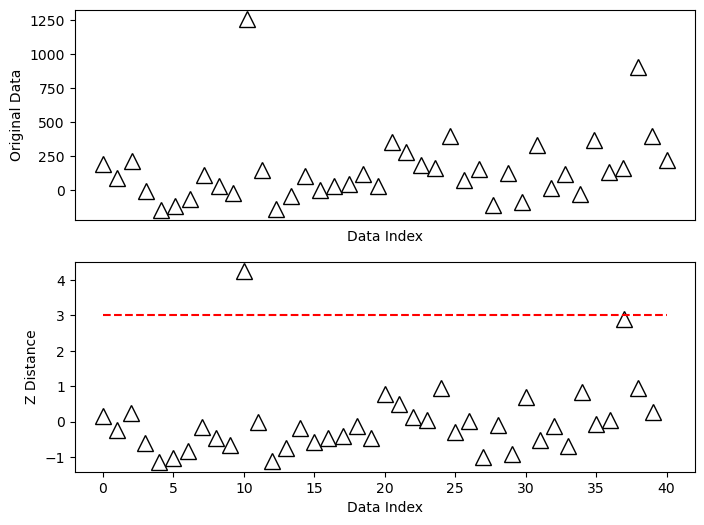

In [5]:
# plotting data

fig,ax = plt.subplots(2,1,figsize=(8,6))
#plotting original data
ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Original Data')
#plotting z score data
ax[1].plot(z_data,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zthresh,zthresh],'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Z Distance')
plt.show()

### Identifying outliers

In [6]:
outliers = np.where(abs(z_data) > zthresh)[0]
outliers

array([10], dtype=int64)

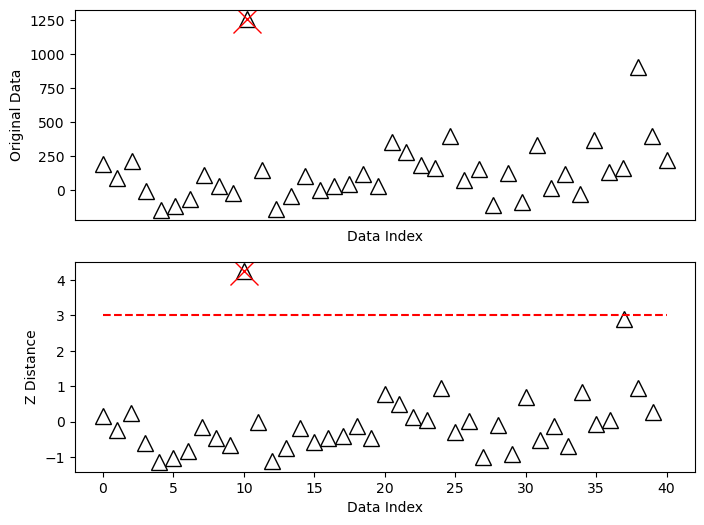

In [7]:
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,z_data[outliers],'x',color='r',markersize=20)
fig

## Iterative approach of z score to remove more outliers

The z-score iterative method is an approach to remove outliers by repeatedly calculating z-scores and removing data points with z-scores exceeding a certain threshold until no more outliers are detected. Here's a step-by-step explanation of this method:

1. **Calculate the Mean and Standard Deviation**: Begin by calculating the mean (average) and standard deviation of your dataset. These values are used to compute the z-scores.

2. **Compute Initial Z-Scores**: Calculate the z-score for each data point in your dataset using the formula:
   
   **Z-Score = (Data Point - Mean) / Standard Deviation**

3. **Set a Threshold**: Decide on a threshold value, typically a z-score of 2 or 3 is used. This threshold determines how far from the mean a data point can be before it's considered an outlier.

4. **Identify Outliers**: Go through your dataset and identify data points with z-scores greater than the chosen threshold. These are your initial outliers.

5. **Remove Initial Outliers**: Remove these initial outliers from your dataset.

6. **Recalculate Mean and Standard Deviation**: After removing outliers, calculate the new mean and standard deviation for your updated dataset.

7. **Repeat Steps 2-6**: Repeat the process of calculating z-scores for the remaining data points, identifying outliers based on the updated threshold, and removing them. Continue this iterative process until no more outliers are detected (i.e., all data points have z-scores within the threshold).

8. **Stop When No Outliers Remain**: Continue the iterations until no more outliers are found or until you reach a predefined number of iterations. Be cautious not to overdo it, as repeatedly removing outliers can lead to data loss and bias if not done carefully.

This iterative approach is useful when you want to be more aggressive in removing outliers or when your dataset contains multiple layers of outliers. It allows you to gradually clean your data by iteratively identifying and removing outliers, leading to a dataset with fewer extreme values. However, it's important to use this method judiciously and monitor the impact on your data, as excessive outlier removal can potentially distort your dataset.

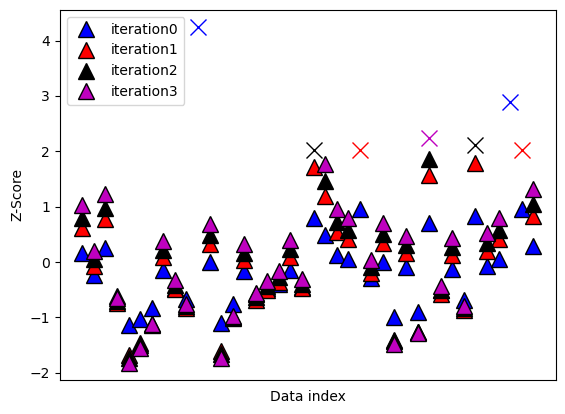

In [9]:
zthresh = 2
dataz = (data-np.mean(data))/np.std(data)

colorz = 'brkm'
count =0 

while True:
    dataz = (dataz-np.nanmean(dataz))/np.nanstd(dataz)
    
    # find data values to remove
    removeData = dataz > zthresh
    #print(removeData)
    
    if sum(removeData)==0:
        break
    else:
        plt.plot(np.where(removeData)[0],dataz[removeData],'%sx'%colorz[count],markersize=12)
        dataz[removeData]= np.nan # we are not removing outliers instead converting to nan
        
    #replot
    plt.plot(dataz,'k^',markersize=12,markerfacecolor=colorz[count],label='iteration%g'%count)
    count = count+1

plt.xticks([])
plt.xlabel('Data index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

### Drawbacks

While the z-score iterative method can be effective in identifying and removing outliers, it also has some drawbacks and limitations to consider:

1. **Loss of Data**: One of the most significant drawbacks is the potential loss of data. Repeatedly removing outliers can result in the removal of valid data points that are not truly outliers. This can lead to a loss of information and potentially bias your analysis.

2. **Sensitivity to Threshold Selection**: The effectiveness of the method depends on choosing an appropriate z-score threshold. Selecting a threshold that is too aggressive may remove data points that are not outliers, while a threshold that is too lenient may fail to identify important outliers.

3. **Iterative Nature**: The iterative process can be computationally expensive and time-consuming, especially for large datasets. It may require multiple passes through the data, making it less efficient than some other outlier detection methods.

4. **Potential Overfitting**: If you iteratively remove outliers until none are left, you risk overfitting your data to a specific threshold and potentially eliminating valuable information that was initially considered an outlier but is relevant to your analysis.

5. **Assumption of Normality**: The z-score method assumes that your data follows a normal distribution. If your data is not normally distributed, the method may not perform well, as it relies on the mean and standard deviation to calculate z-scores.

6. **Ignoring Context**: The z-score method does not take into account the context or domain-specific knowledge. Some data points may be outliers for a good reason, and removing them without considering the context can lead to erroneous conclusions.

7. **Impact on Statistical Tests**: If you plan to perform statistical tests or modeling on the cleaned data, removing outliers can affect the assumptions of these tests and the validity of your results.

8. **Data Transformation**: Repeatedly removing outliers can alter the distribution and shape of your data, potentially requiring additional data transformations to make it suitable for analysis.

To mitigate these drawbacks, it's important to use the z-score iterative method cautiously and in conjunction with domain knowledge. Consider alternative outlier detection techniques, such as the IQR method or visual inspection of data plots, to complement the z-score method. Additionally, when removing outliers, document your approach and the reasons behind each removal to maintain transparency and rigor in your data analysis.

### Modified z-score method for Non Normal Distribution 

The modified z-score method, also known as the modified Z-scores or the generalized Z-score method, is a variation of the traditional z-score method that can be used for detecting outliers in datasets that are not normally distributed or have heavy-tailed distributions. This method is less sensitive to extreme values compared to the standard z-score method. Here's how it works:

1. **Calculate the Median and Median Absolute Deviation (MAD)**:
   - Calculate the median (M) of your dataset. The median is the middle value when the data is sorted, and it is less sensitive to outliers than the mean.
   - Calculate the median absolute deviation (MAD) of your dataset. MAD is the median of the absolute differences between each data point and the median (M). Mathematically, MAD = Median(|Data Point - M|).

2. **Calculate the Modified Z-Score for Each Data Point**:
   - Calculate the modified Z-score (Z) for each data point using the formula:
   
     **Z = 0.6745 * (Data Point - M) / MAD**

   The factor 0.6745 is used to make Z approximately equivalent to a standard Z-score for normally distributed data. This scaling factor ensures that Z has a similar interpretation to a standard Z-score.

3. **Set a Threshold**: Decide on a threshold value, typically around 2 or 3, similar to the standard Z-score method. Data points with modified Z-scores greater than this threshold are considered outliers.

4. **Identify Outliers**: Go through your dataset and identify data points with modified Z-scores greater than the chosen threshold. These are your outliers.

5. **Remove or Handle Outliers**: As with the standard Z-score method, you can choose to either remove these outliers from your dataset or handle them differently based on your analysis needs.

The key difference between the modified Z-score method and the standard Z-score method is the use of the median and MAD instead of the mean and standard deviation. This makes the modified Z-score method robust against outliers and works well with datasets that have non-normal or heavy-tailed distributions.

Remember that the choice of the threshold value is important and should be determined based on your specific dataset and analysis goals. A lower threshold will be more conservative and flag fewer data points as outliers, while a higher threshold will be more aggressive in identifying outliers. It's often a good practice to visually inspect your data and consider domain knowledge when selecting an appropriate threshold.

In [18]:
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed)/dataMAD

dataMz

array([ 3.33937950e-01, -1.02284319e-01,  4.35138568e-01, -5.38330359e-01,
       -1.13935058e+00, -1.00157484e+00, -7.82519392e-01, -9.11598046e-04,
       -3.68424734e-01, -5.94185138e-01,  4.95796474e+00,  1.53826550e-01,
       -1.09377007e+00, -7.01214402e-01, -3.25173603e-02, -4.93387655e-01,
       -3.76847487e-01, -2.87683668e-01,  9.11598046e-04, -3.60999348e-01,
        1.04534888e+00,  7.12521670e-01,  2.91315858e-01,  2.08294369e-01,
        1.24007864e+00, -1.81424633e-01,  1.61206669e-01, -9.62054187e-01,
        4.31681145e-02, -8.66612715e-01,  9.51844001e-01, -4.24836601e-01,
        2.17851100e-02, -6.11425889e-01,  1.09318453e+00,  7.20863539e-02,
        2.09329243e-01,  3.42501440e+00,  1.24073970e+00,  4.74734278e-01])

In [23]:
zthresh = 3

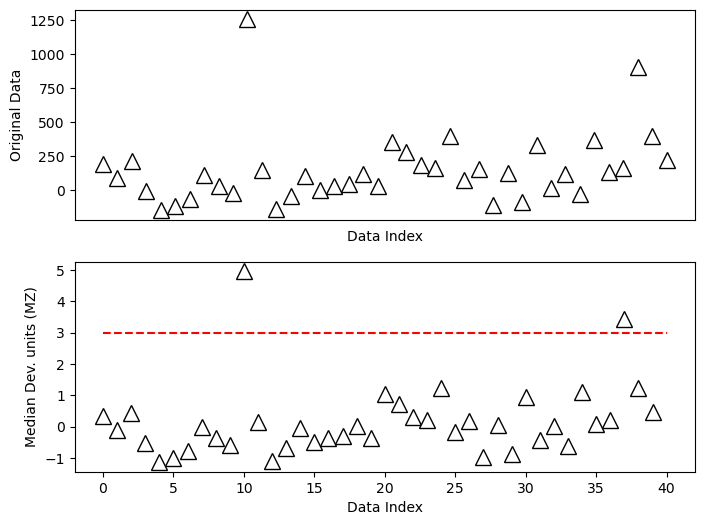

In [24]:
# plot
fig,ax = plt.subplots(2,1,figsize=(8,6))
#plotting original data
ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Original Data')
#plotting z score data
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zthresh,zthresh],'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median Dev. units (MZ)')
plt.show()